26
     Valores
0   0.611917
1   0.781006
2   0.804825
3   0.870509
4   0.884880
5   0.893236
6   0.890972
7   0.887613
8   0.899094
9   0.898313
10  0.898548
11  0.902296
12  0.903233
13  0.902765
14  0.904561
15  0.904795
16  0.907060
17  0.907919
18  0.907295
19  0.906201
20  0.907998
21  0.906670
22  0.907607
23  0.906982
24  0.908310
25  0.908388
26  0.907373
27  0.907216
28  0.907451
29  0.907373


<Axes: xlabel='None', ylabel='Valores'>

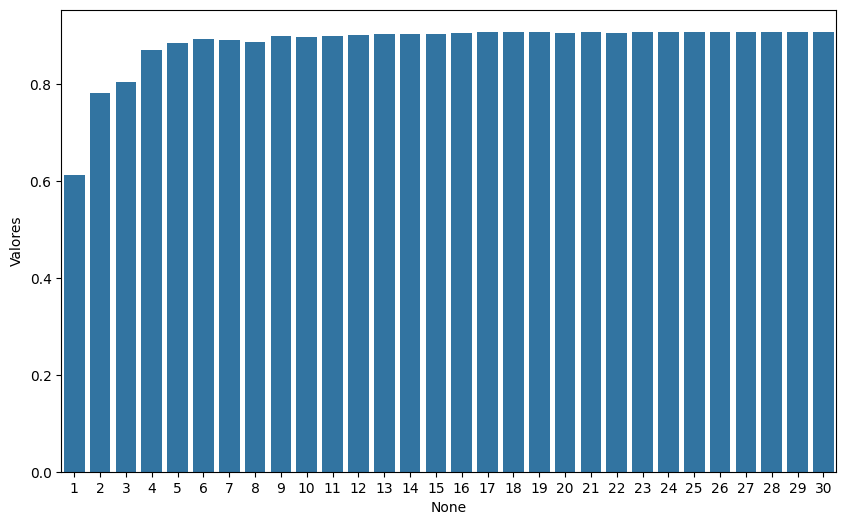

In [1]:
import warnings
warnings.filterwarnings("ignore", "\nPyarrow", DeprecationWarning)
import pandas as pd
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/selecao-de-features/main/dados/hotel.csv')

x = dados.drop('booking_status',axis=1)
y = dados['booking_status']

x_treino,x_teste,y_treino,y_teste = train_test_split(
    x,y,
    stratify=y,
    random_state=5
)
parametros = {
    'max_depth': None, 
    'min_samples_leaf': 1, 
    'min_samples_split': 2, 
    'n_estimators': 300,
    'random_state': 5
}
modelo = RandomForestClassifier(**parametros)

cv = StratifiedKFold(shuffle=True,random_state=5)

rfecv = RFECV(
    estimator=modelo,
    cv=cv,
    scoring='recall',
    n_jobs=-1
)
rfecv.fit(x_treino,y_treino)

print(rfecv.n_features_)

x_treino_selecionado = rfecv.transform(x_treino)
x_teste_selecionado = rfecv.transform(x_teste)
modelo.fit(x_treino_selecionado,y_treino)

resultado = rfecv.cv_results_

results_df = pd.DataFrame({'Valores':resultado['mean_test_score']})
print(results_df)

plt.figure(figsize=(10,6))
sns.barplot(x=results_df.index+1,y='Valores',data=results_df)